In [181]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
diagnosis_data = pd.read_csv("data/patient-discharge-data-by-principal-diagnosis.csv")

In [3]:
diagnosis_data.head()

Year  OSHPD ID     Facility Name Type of Control County Name  \
0  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
1  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
2  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
3  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
4  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   

    Principal Diagnosis Group  Count  
0                  Infections    243  
1                   Neoplasms     68  
2        Endocrine/Metabolism     99  
3  Blood/Blood-forming Organs     54  
4        Psychoses & Neurosis     33

In [4]:
diagnosis_data.describe()

Year       OSHPD ID         Count
count  40731.000000   40731.000000  40731.000000
mean    2011.489848  281218.986251    571.990057
std        1.713657  135949.175171    890.239564
min     2009.000000   10735.000000      1.000000
25%     2010.000000  190382.000000     48.000000
50%     2011.000000  301155.000000    227.000000
75%     2013.000000  370977.000000    711.000000
max     2014.000000  580996.000000  10560.000000

In [5]:
#oldest year in data
min(diagnosis_data.Year)

2009

In [6]:
#most recent year in data
max(diagnosis_data.Year)

2014

In [7]:
#number of different IDs
pd.unique(diagnosis_data['OSHPD ID']).size

469

In [8]:
#number of different Facilities
pd.unique(diagnosis_data['Facility Name']).size

571

In [9]:
#number of different Counties
pd.unique(diagnosis_data['County Name']).size

56

In [10]:
#number of different Diagnosis
pd.unique(diagnosis_data['Principal Diagnosis Group']).size

19

In [11]:
#list of different Diagnosis
pd.unique(diagnosis_data['Principal Diagnosis Group'])

array(['Infections', 'Neoplasms', 'Endocrine/Metabolism',
       'Blood/Blood-forming Organs', 'Psychoses & Neurosis',
       'Nervous & Sensory Systems', 'Circulatory', 'Respiratory',
       'Digestive', 'Genitourinary', 'All Pregnancies', 'Skin Disorders',
       'Musculoskeletal', 'Congenital Anomalies (Birth Defects)',
       'Symptoms', 'Injuries/Drugs/Complications',
       'Other Reasons for Health Services', 'Perinatal Disorders',
       'Births'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86e9701990>,
      dtype=object)

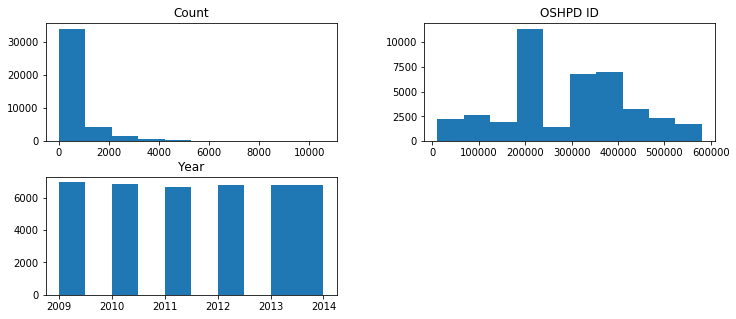

In [12]:
diagnosis_data.hist(figsize=(12, 5), grid=False)

In [13]:
#total number of entries that have null value
diagnosis_data.isnull().sum()

Year                         0
OSHPD ID                     0
Facility Name                0
Type of Control              0
County Name                  0
Principal Diagnosis Group    0
Count                        0
dtype: int64

In [14]:
diagnosis_data

Year  OSHPD ID                     Facility Name Type of Control  \
0      2009     10735                  ALAMEDA HOSPITAL        District   
1      2009     10735                  ALAMEDA HOSPITAL        District   
2      2009     10735                  ALAMEDA HOSPITAL        District   
3      2009     10735                  ALAMEDA HOSPITAL        District   
4      2009     10735                  ALAMEDA HOSPITAL        District   
...     ...       ...                               ...             ...   
40726  2014     90933          MARSHALL  MEDICAL CENTER      Non-Profit   
40727  2014     90933          MARSHALL  MEDICAL CENTER      Non-Profit   
40728  2014     90933          MARSHALL  MEDICAL CENTER      Non-Profit   
40729  2014     90933          MARSHALL  MEDICAL CENTER      Non-Profit   
40730  2014     94002  TELECARE EL DORADO COUNTY P.H.F.        Investor   

      County Name          Principal Diagnosis Group  Count  
0         ALAMEDA                         Infections    243  
1         ALAMEDA                          Neoplasms     68  
2         ALAMEDA               Endocrine/Metabolism     99  
3         ALAMEDA         Blood/Blood-forming Organs     54  
4         ALAMEDA               Psychoses & Neurosis     33  
...           ...                                ...    ...  
40726   EL DORADO                           Symptoms     84  
40727   EL DORADO       Injuries/Drugs/Complications    378  
40728   EL DORADO  Other Reasons for Health Services    349  
40729   EL DORADO                             Births    509  
40730   EL DORADO               Psychoses & Neurosis    475  

[40731 rows x 7 columns]

In [15]:
diagnosis_data.groupby("OSHPD ID").count()

Year  Facility Name  Type of Control  County Name  \
OSHPD ID                                                      
10735      100            100              100          100   
10739      114            114              114          114   
10776      108            108              108          108   
10782        6              6                6            6   
10805       76             76               76           76   
...        ...            ...              ...          ...   
560838      16             16               16           16   
564121      54             54               54           54   
571086     113            113              113          113   
574010     112            112              112          112   
580996     112            112              112          112   

          Principal Diagnosis Group  Count  
OSHPD ID                                    
10735                           100    100  
10739                           114    114  
10776                           108    108  
10782                             6      6  
10805                            76     76  
...                             ...    ...  
560838                           16     16  
564121                           54     54  
571086                          113    113  
574010                          112    112  
580996                          112    112  

[469 rows x 6 columns]

In [16]:
building_data = pd.read_csv("data/Hospital_Building_Data.csv")

In [17]:
building_data.groupby("Facility Name").count()

County Code  Perm ID  City  \
Facility Name                                                                   
AHMC Anaheim Regional Medical Center                        15       15    15   
Adventist Health And Rideout                                17       17    17   
Adventist Health Bakersfield                                 7        7     7   
Adventist Health Bakersfield - West Side Hospital            4        4     0   
Adventist Health Clearlake                                   6        6     6   
...                                                        ...      ...   ...   
West Anaheim Medical Center                                  5        5     5   
West Covina Medical Center                                   4        4     4   
West Hills Hospital & Medical Center                         4        4     4   
Whittier Hospital Medical Center                             8        8     8   
Woodland Memorial Hospital                                   6        6     6   

                                                   Building Nbr  \
Facility Name                                                     
AHMC Anaheim Regional Medical Center                         15   
Adventist Health And Rideout                                 17   
Adventist Health Bakersfield                                  7   
Adventist Health Bakersfield - West Side Hospital             4   
Adventist Health Clearlake                                    6   
...                                                         ...   
West Anaheim Medical Center                                   5   
West Covina Medical Center                                    4   
West Hills Hospital & Medical Center                          4   
Whittier Hospital Medical Center                              8   
Woodland Memorial Hospital                                    6   

                                                   Building Name  \
Facility Name                                                      
AHMC Anaheim Regional Medical Center                          15   
Adventist Health And Rideout                                  17   
Adventist Health Bakersfield                                   7   
Adventist Health Bakersfield - West Side Hospital              4   
Adventist Health Clearlake                                     6   
...                                                          ...   
West Anaheim Medical Center                                    5   
West Covina Medical Center                                     4   
West Hills Hospital & Medical Center                           4   
Whittier Hospital Medical Center                               8   
Woodland Memorial Hospital                                     6   

                                                   Building Status  \
Facility Name                                                        
AHMC Anaheim Regional Medical Center                            15   
Adventist Health And Rideout                                    17   
Adventist Health Bakersfield                                     7   
Adventist Health Bakersfield - West Side Hospital                4   
Adventist Health Clearlake                                       6   
...                                                            ...   
West Anaheim Medical Center                                      5   
West Covina Medical Center                                       4   
West Hills Hospital & Medical Center                             4   
Whittier Hospital Medical Center                                 8   
Woodland Memorial Hospital                                       6   

                                                   SPC Rating *  Building URL  \
Facility Name                                                                   
AHMC Anaheim Regional Medical Center                         15            15   
Adventist Health And Rideout                                 10            17   
Adven

In [18]:
diagnosis_data["lowercase_facility"] = diagnosis_data["Facility Name"].str.lower()
building_data["lowercase_facility"] = building_data["Facility Name"].str.lower()

In [19]:
building_data.groupby("lowercase_facility")[["lowercase_facility", "Latitude", "Longitude"]].first()

lowercase_facility  \
lowercase_facility                                                                                     
adventist health and rideout                                            adventist health and rideout   
adventist health bakersfield                                            adventist health bakersfield   
adventist health bakersfield - west side hospital  adventist health bakersfield - west side hospital   
adventist health clearlake                                                adventist health clearlake   
adventist health feather river                                        adventist health feather river   
...                                                                                              ...   
west anaheim medical center                                              west anaheim medical center   
west covina medical center                                                west covina medical center   
west hills hospital & medical center                            west hills hospital & medical center   
whittier hospital medical center                                    whittier hospital medical center   
woodland memorial hospital                                                woodland memorial hospital   

                                                    Latitude   Longitude  
lowercase_facility                                                        
adventist health and rideout                       39.138222 -121.594360  
adventist health bakersfield                       35.383377 -119.019699  
adventist health bakersfield - west side hospital  35.375436 -119.092719  
adventist health clearlake                         38.936192 -122.620243  
adventist health feather river                     39.757523 -121.569183  
...                                                      ...         ...  
west anaheim medical center                        33.825577 -117.994919  
west covina medical center                         34.071350 -117.944778  
west hills hospital & medical center               34.203541 -118.629374  
whittier hospital medical center                   33.950382 -118.004646  
woodland memorial hospital                         38.664040 -121.792152  

[415 rows x 3 columns]

In [20]:
diagnosis_with_loc = (diagnosis_data.merge(building_data.groupby("lowercase_facility")[["Latitude", "Longitude"]].first(), left_on='lowercase_facility', right_on='lowercase_facility')
          )
print(diagnosis_with_loc)

       Year  OSHPD ID                         Facility Name Type of Control  \
0      2009     10735                      ALAMEDA HOSPITAL        District   
1      2009     10735                      ALAMEDA HOSPITAL        District   
2      2009     10735                      ALAMEDA HOSPITAL        District   
3      2009     10735                      ALAMEDA HOSPITAL        District   
4      2009     10735                      ALAMEDA HOSPITAL        District   
...     ...       ...                                   ...             ...   
21510  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21511  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21512  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21513  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21514  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   

        County Name          Principal Diagnosis Gr

In [21]:
diagnosis_with_loc.head()

Year  OSHPD ID     Facility Name Type of Control County Name  \
0  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
1  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
2  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
3  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   
4  2009     10735  ALAMEDA HOSPITAL        District     ALAMEDA   

    Principal Diagnosis Group  Count lowercase_facility   Latitude   Longitude  
0                  Infections    243   alameda hospital  37.762657 -122.253899  
1                   Neoplasms     68   alameda hospital  37.762657 -122.253899  
2        Endocrine/Metabolism     99   alameda hospital  37.762657 -122.253899  
3  Blood/Blood-forming Organs     54   alameda hospital  37.762657 -122.253899  
4        Psychoses & Neurosis     33   alameda hospital  37.762657 -122.253899

In [22]:
#list diffiernt type of diagnosis groups
diagnosis_data.groupby("Principal Diagnosis Group").first()

Year  OSHPD ID  \
Principal Diagnosis Group                              
All Pregnancies                       2009     10735   
Births                                2009     10739   
Blood/Blood-forming Organs            2009     10735   
Circulatory                           2009     10735   
Congenital Anomalies (Birth Defects)  2009     10735   
Digestive                             2009     10735   
Endocrine/Metabolism                  2009     10735   
Genitourinary                         2009     10735   
Infections                            2009     10735   
Injuries/Drugs/Complications          2009     10735   
Musculoskeletal                       2009     10735   
Neoplasms                             2009     10735   
Nervous & Sensory Systems             2009     10735   
Other Reasons for Health Services     2009     10735   
Perinatal Disorders                   2009     10739   
Psychoses & Neurosis                  2009     10735   
Respiratory                           2009     10735   
Skin Disorders                        2009     10735   
Symptoms                              2009     10735   

                                                                    Facility Name  \
Principal Diagnosis Group                                                           
All Pregnancies                                                  ALAMEDA HOSPITAL   
Births                                ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS   
Blood/Blood-forming Organs                                       ALAMEDA HOSPITAL   
Circulatory                                                      ALAMEDA HOSPITAL   
Congenital Anomalies (Birth Defects)                             ALAMEDA HOSPITAL   
Digestive                                                        ALAMEDA HOSPITAL   
Endocrine/Metabolism                                             ALAMEDA HOSPITAL   
Genitourinary                                                    ALAMEDA HOSPITAL   
Infections                                                       ALAMEDA HOSPITAL   
Injuries/Drugs/Complications                                     ALAMEDA HOSPITAL   
Musculoskeletal                                                  ALAMEDA HOSPITAL   
Neoplasms                                                        ALAMEDA HOSPITAL   
Nervous & Sensory Systems                                        ALAMEDA HOSPITAL   
Other Reasons for Health Services                                ALAMEDA HOSPITAL   
Perinatal Disorders                   ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS   
Psychoses & Neurosis                                             ALAMEDA HOSPITAL   
Respiratory                                                      ALAMEDA HOSPITAL   
Skin Disorders                                                   ALAMEDA HOSPITAL   
Symptoms                                                         ALAMEDA HOSPITAL   

                                     Type of Control County Name  Count  \
Principal Diagnosis Group                                                 
All Pregnancies                             District     ALAMEDA     12   
Births                                    Non-Profit     ALAMEDA   7658   
Blood/Blood-forming Organs                  District     ALAMEDA     54   
Circulatory                                 District     ALAMEDA    563   
Congenital Anomalies (Birth Defects)        District     ALAMEDA      2   
Digestive                                   District     ALAMEDA    548   
Endocrine/Metabolism                        District     ALAMEDA     99   
Genitourinary                               District     ALAMEDA    168   
Infections                                  District     ALAMEDA    243   
Injuries/Drugs/Complications                District     ALAMEDA    204   
Musculoskeletal                             District     ALAMEDA     78   
Neoplasms                                   District     ALAMEDA     68   
Nervous & Sensory Systems

In [23]:

group = diagnosis_data.groupby(["Year", "Facility Name"])

In [24]:
#count column shows total number of diagnosis from hospital that year
group.sum()

OSHPD ID  Count
Year Facility Name                                               
2009 AHMC ANAHEIM REGIONAL MEDICAL CENTER          5720862  14478
     ALAMEDA CO MED CTR - HIGHLAND CAMPUS           206074  14731
     ALAMEDA HOSPITAL                               182495   2842
     ALHAMBRA HOSPITAL                             3230289   3881
     ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS    204041  25190
...                                                    ...    ...
2014 WEST ANAHEIM MEDICAL CENTER                   5123443   5910
     WEST HILLS HOSPITAL AND MEDICAL CENTER        3626321   9284
     WHITE MEMORIAL MEDICAL CENTER                 3626682  23242
     WHITTIER HOSPITAL MEDICAL CENTER              3626777  12492
     WOODLAND MEMORIAL HOSPITAL                   10850634   4825

[2651 rows x 2 columns]

In [25]:
patient_df = pd.read_csv("data/2012-patient-discharge-DATA-ONLY.csv")

In [26]:
patient_df.filter(regex='TOC',axis=1).head()

TOC_Acute  TOC_SN_IC  TOC_Psych  TOC_Chem_Dep  TOC_Rehab  TOC_Unknown
0    12137.0      190.0     2986.0           NaN      465.0          NaN
1        NaN        NaN      683.0           NaN        NaN          NaN
2     9514.0        NaN      777.0           NaN        NaN          NaN
3        NaN        NaN      398.0           NaN        NaN          NaN
4        NaN        NaN      684.0           NaN        NaN          NaN

In [27]:
patient_df.head()

FacilityNum  oshpd_id                         FACILITY NAME  \
0    106010846     10846         ALAMEDA COUNTY MEDICAL CENTER   
1    106044006     44006                      BUTTE COUNTY PHF   
2    106070924     70924  CONTRA COSTA REGIONAL MEDICAL CENTER   
3    106094002     94002                EL DORADO COUNTY P H F   
4    106124004    124004                   SEMPERVIRENS P.H.F.   

            DBA_ADDRESS1     DBA_CITY  DBA_ZIP_CODE   COUNTY NAME  \
0  1411 EAST 31ST STREET      OAKLAND         94602       ALAMEDA   
1   592 RIO LINDO AVENUE        CHICO         95926         BUTTE   
2   2500 ALHAMBRA AVENUE     MARTINEZ         94553  CONTRA COSTA   
3    935-B SPRING STREET  PLACERVILLE         95667     EL DORADO   
4        720 WOOD STREET       EUREKA         95501      HUMBOLDT   

  LICENSED BED SIZE ASSEMBLY DISTRICT SENATE DISTRICT  ...  \
0           300-499       District 18      District 9  ...   
1              1-49        District 3      District 4  ...   
2           150-199       District 14      District 3  ...   
3              1-49        District 5      District 1  ...   
4              1-49        District 2      District 2  ...   

  EC_Submersion_Suffocation_Foreig EC_Other_Accidents  \
0                             14.0              143.0   
1                              NaN                NaN   
2                              9.0               97.0   
3                              NaN                NaN   
4                              NaN                NaN   

   EC_Adverse_Effects_of_Drugs  EC_Self_Inflicted  EC_Inflicted_by_Others  \
0                        500.0               66.0                   507.0   
1                          NaN                NaN                     NaN   
2                        379.0               51.0                    35.0   
3                          NaN                NaN                     NaN   
4                          NaN                NaN                     NaN   

   EC_Undetermined  EC_War  EC_Late_Effects_of_Injury  EC_None  Dsch_Days  
0             16.0     NaN                      209.0    12633     123943  
1              NaN     NaN                        NaN      683       4484  
2             20.0     NaN                       36.0     8995      45257  
3              NaN     NaN                        NaN      398       3035  
4              NaN     NaN                        NaN      684       3372  

[5 rows x 138 columns]

In [28]:
list(patient_df.columns)

['FacilityNum',
 'oshpd_id',
 'FACILITY NAME',
 'DBA_ADDRESS1',
 'DBA_CITY',
 'DBA_ZIP_CODE',
 'COUNTY NAME',
 'LICENSED BED SIZE',
 'ASSEMBLY DISTRICT',
 'SENATE DISTRICT',
 'TYPE CONTROL',
 'TEACHING/RURAL',
 'TOC_Acute',
 'TOC_SN_IC',
 'TOC_Psych',
 'TOC_Chem_Dep',
 'TOC_Rehab',
 'TOC_Unknown',
 'Sex_Male',
 'Sex_Female',
 'Sex_Other',
 'Sex_Unknown',
 'Age_Under_1',
 'Age_01_09',
 'Age_10_19',
 'Age_20_29',
 'Age_30_39',
 'Age_40_49',
 'Age_50_59',
 'Age_60_69',
 'Age_70_79',
 'Age_80_',
 'Age_Unknown',
 'RaceGrp_White',
 'RaceGrp_Black',
 'RaceGrp_Hispanic',
 'RaceGrp_Asian',
 'RaceGrp_Native_Am',
 'RaceGrp_Other',
 'RaceGrp_Unknown',
 'Admt_Home',
 'Admt_Resid_Care',
 'Admt_Ambul_Surgery',
 'Admt_SN_IC',
 'Admt_Acute_Inpt_Hosp_Care',
 'Admt_Other_Inpt_Hosp_Care',
 'Admt_Newborn',
 'Admt_Prison_Jail',
 'Admt_Other',
 'Admt_Unknown',
 'Route_Your_ER',
 'Route_Not_Your_ER',
 'Route_Unknown',
 'Adm_Scheduled',
 'Adm_Unscheduled',
 'Adm_Infant_LT_24_hrs',
 'Adm_Unknown',
 'Disp_Routin

In [29]:
#retreive diagnosis from 2009
diagnosis_data[diagnosis_data["Year"]==2009]

Year  OSHPD ID              Facility Name Type of Control County Name  \
0     2009     10735           ALAMEDA HOSPITAL        District     ALAMEDA   
1     2009     10735           ALAMEDA HOSPITAL        District     ALAMEDA   
2     2009     10735           ALAMEDA HOSPITAL        District     ALAMEDA   
3     2009     10735           ALAMEDA HOSPITAL        District     ALAMEDA   
4     2009     10735           ALAMEDA HOSPITAL        District     ALAMEDA   
...    ...       ...                        ...             ...         ...   
6936  2009    580996  RIDEOUT MEMORIAL HOSPITAL      Non-Profit        YUBA   
6937  2009    580996  RIDEOUT MEMORIAL HOSPITAL      Non-Profit        YUBA   
6938  2009    580996  RIDEOUT MEMORIAL HOSPITAL      Non-Profit        YUBA   
6939  2009    580996  RIDEOUT MEMORIAL HOSPITAL      Non-Profit        YUBA   
6940  2009    580996  RIDEOUT MEMORIAL HOSPITAL      Non-Profit        YUBA   

                 Principal Diagnosis Group  Count         lowercase_facility  
0                               Infections    243           alameda hospital  
1                                Neoplasms     68           alameda hospital  
2                     Endocrine/Metabolism     99           alameda hospital  
3               Blood/Blood-forming Organs     54           alameda hospital  
4                     Psychoses & Neurosis     33           alameda hospital  
...                                    ...    ...                        ...  
6936                       Musculoskeletal    146  rideout memorial hospital  
6937  Congenital Anomalies (Birth Defects)      5  rideout memorial hospital  
6938                              Symptoms    755  rideout memorial hospital  
6939          Injuries/Drugs/Complications    713  rideout memorial hospital  
6940     Other Reasons for Health Services     34  rideout memorial hospital  

[6941 rows x 8 columns]

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<BarContainer object of 384 artists>

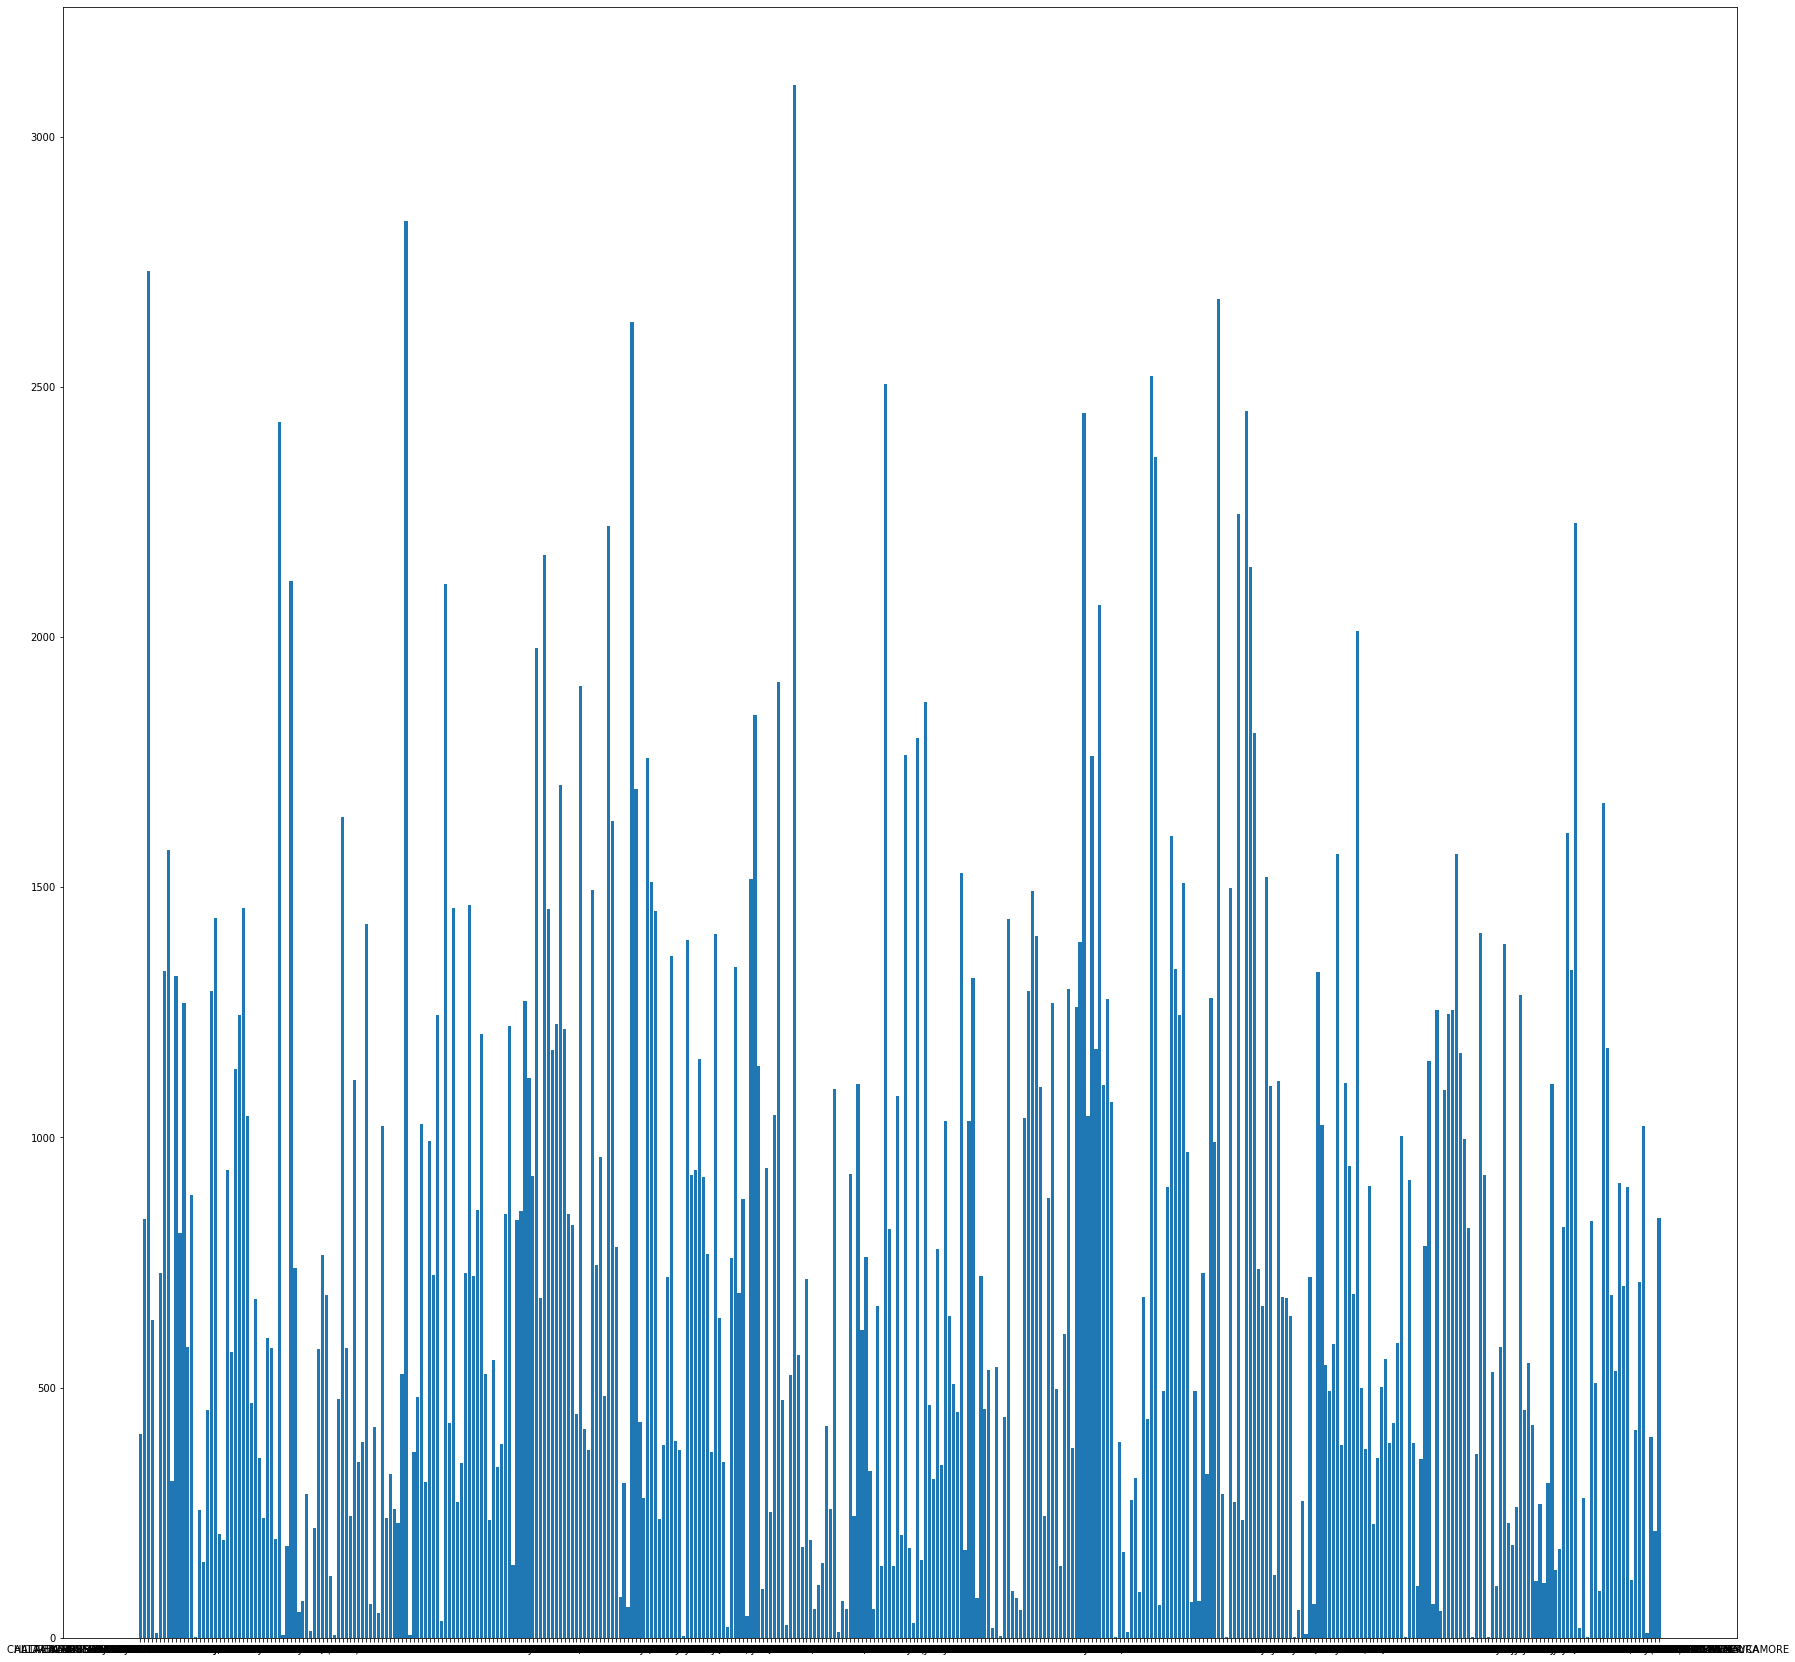

In [30]:
fig,ax = plt.subplots(figsize=[30,30])
filtered = diagnosis_data[diagnosis_data["Year"]==2009][diagnosis_data["Principal Diagnosis Group"]=="Respiratory"]
ax.bar(filtered["Facility Name"], filtered["Count"])

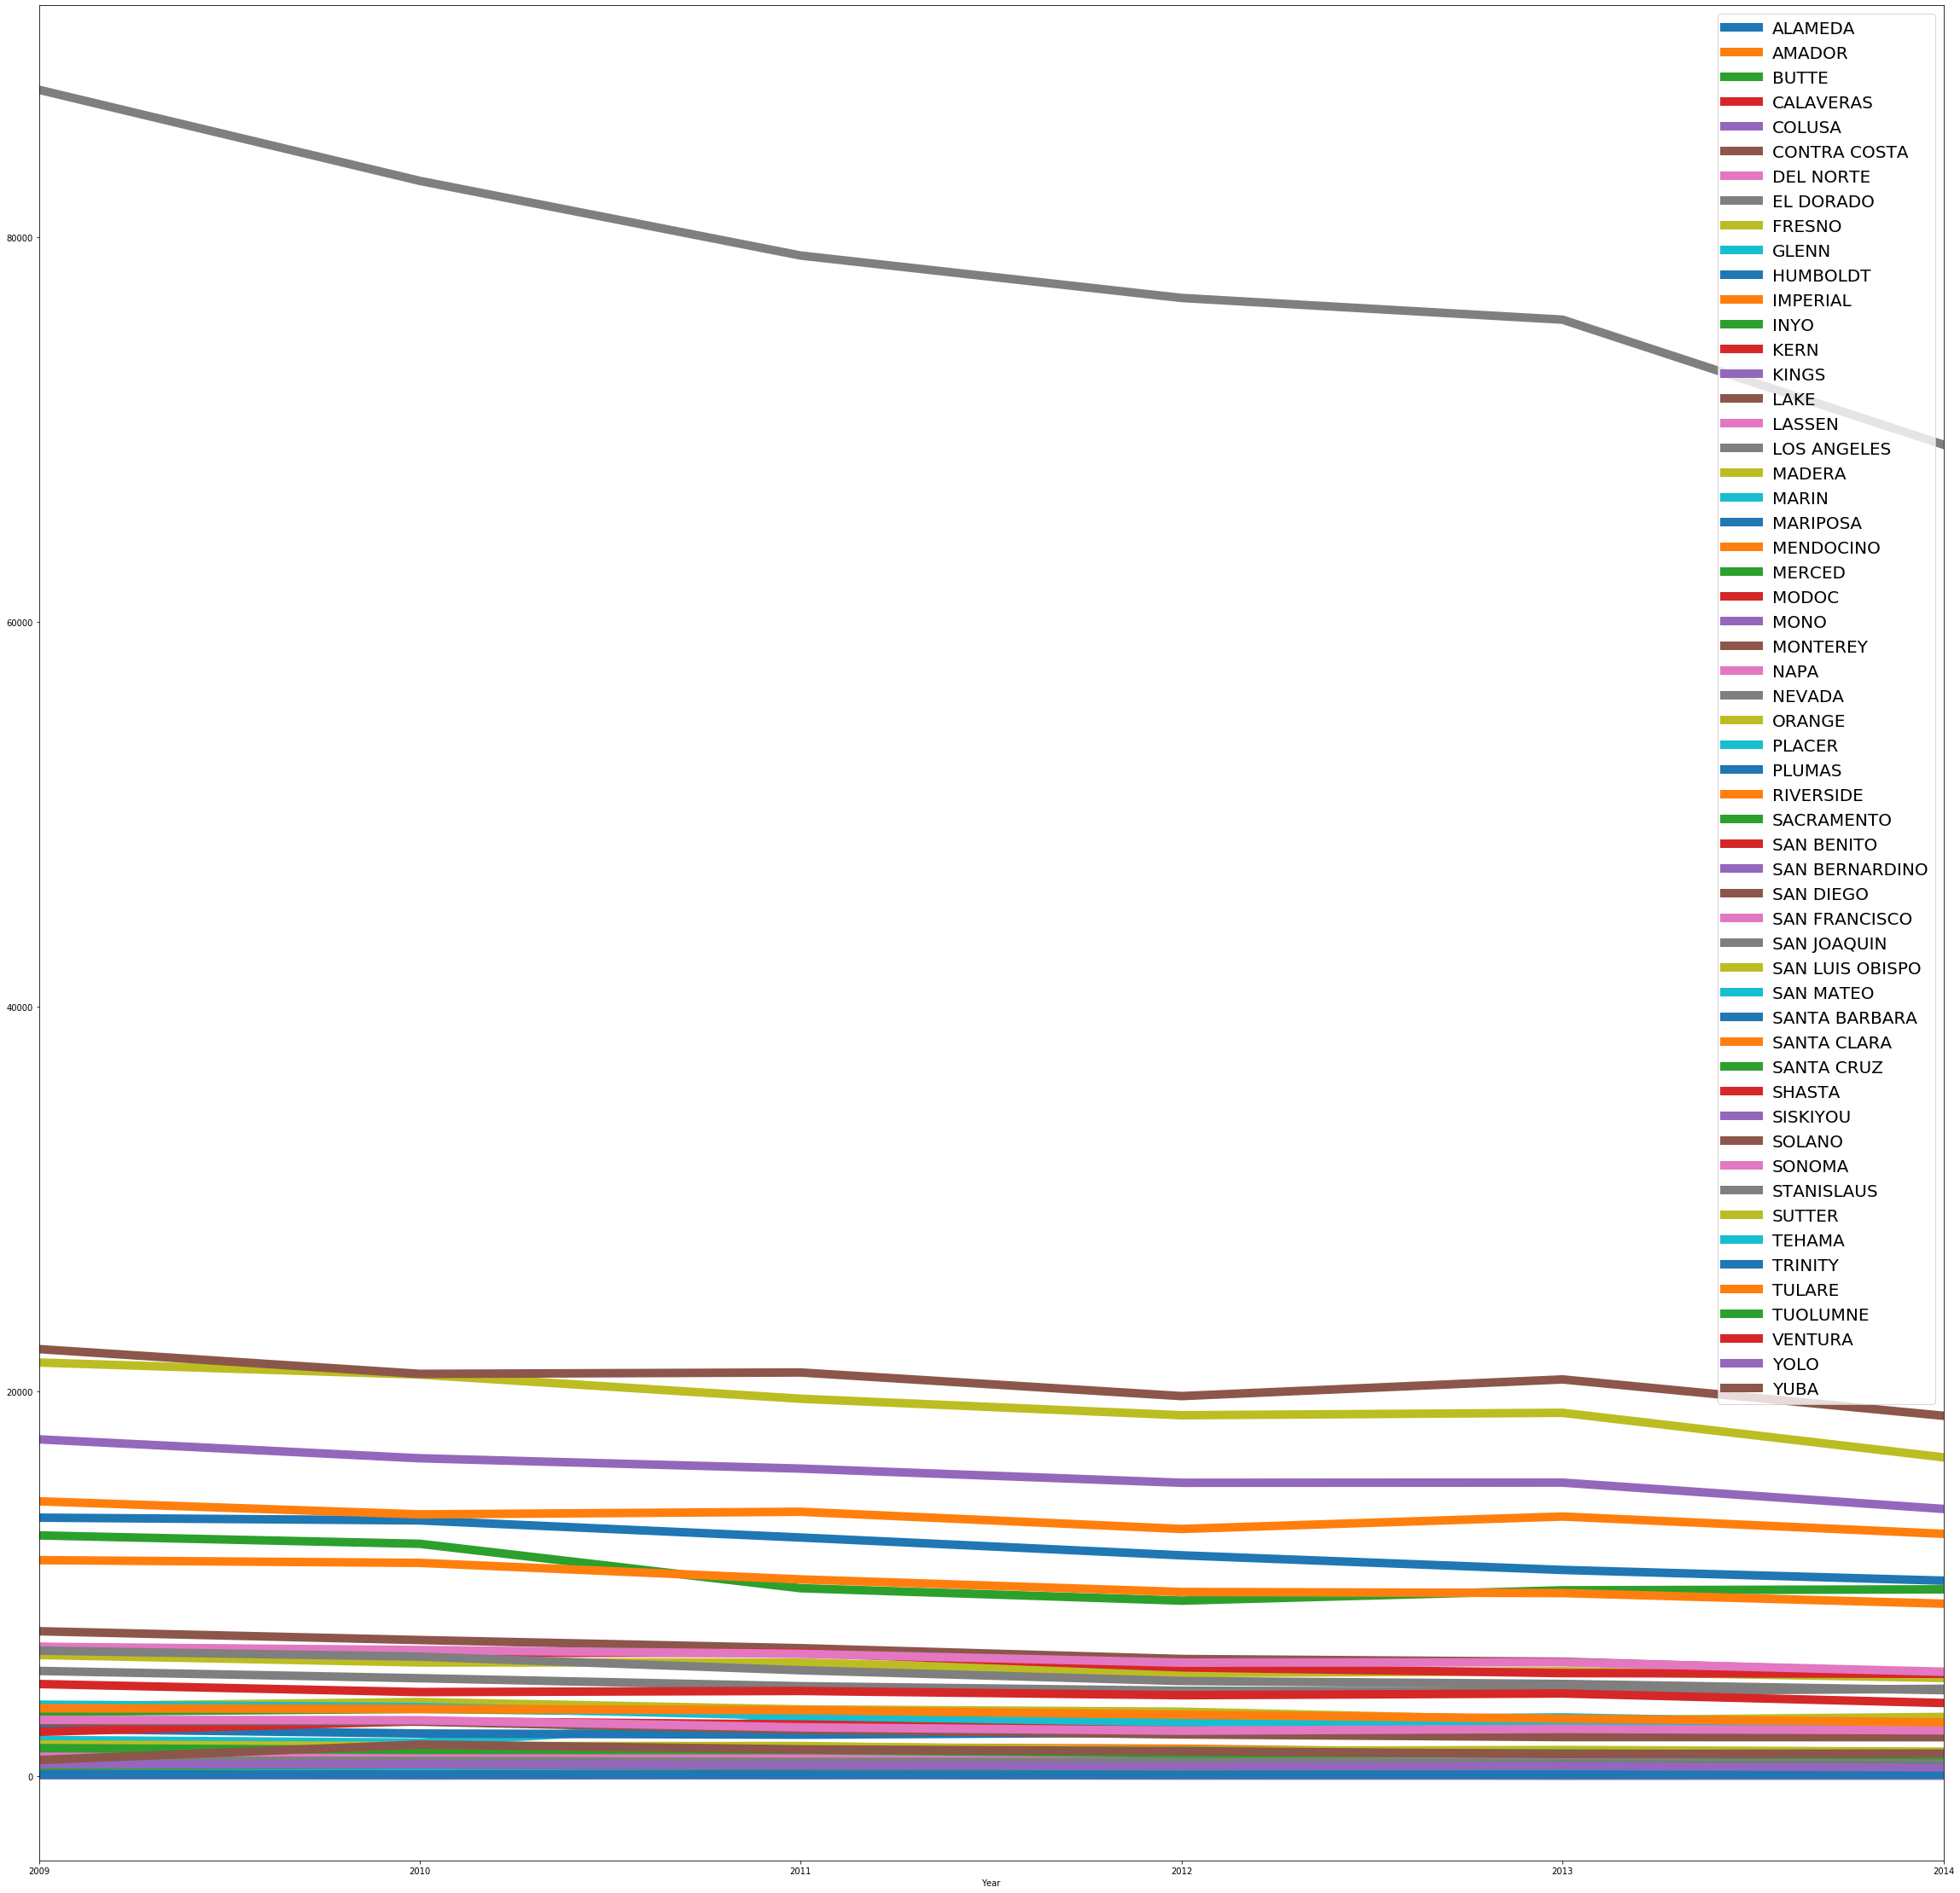

In [31]:
#how has the number of diagnosis of respiratory conditions changes over time for each county
fig,ax = plt.subplots(figsize=[40,40])
filtered = diagnosis_data[diagnosis_data["Principal Diagnosis Group"]=="Respiratory"].copy()
filtered.groupby(["Year","County Name"]).sum()['Count'].unstack().plot(ax=ax, linewidth=10)
ax.legend(prop={'size': 20})

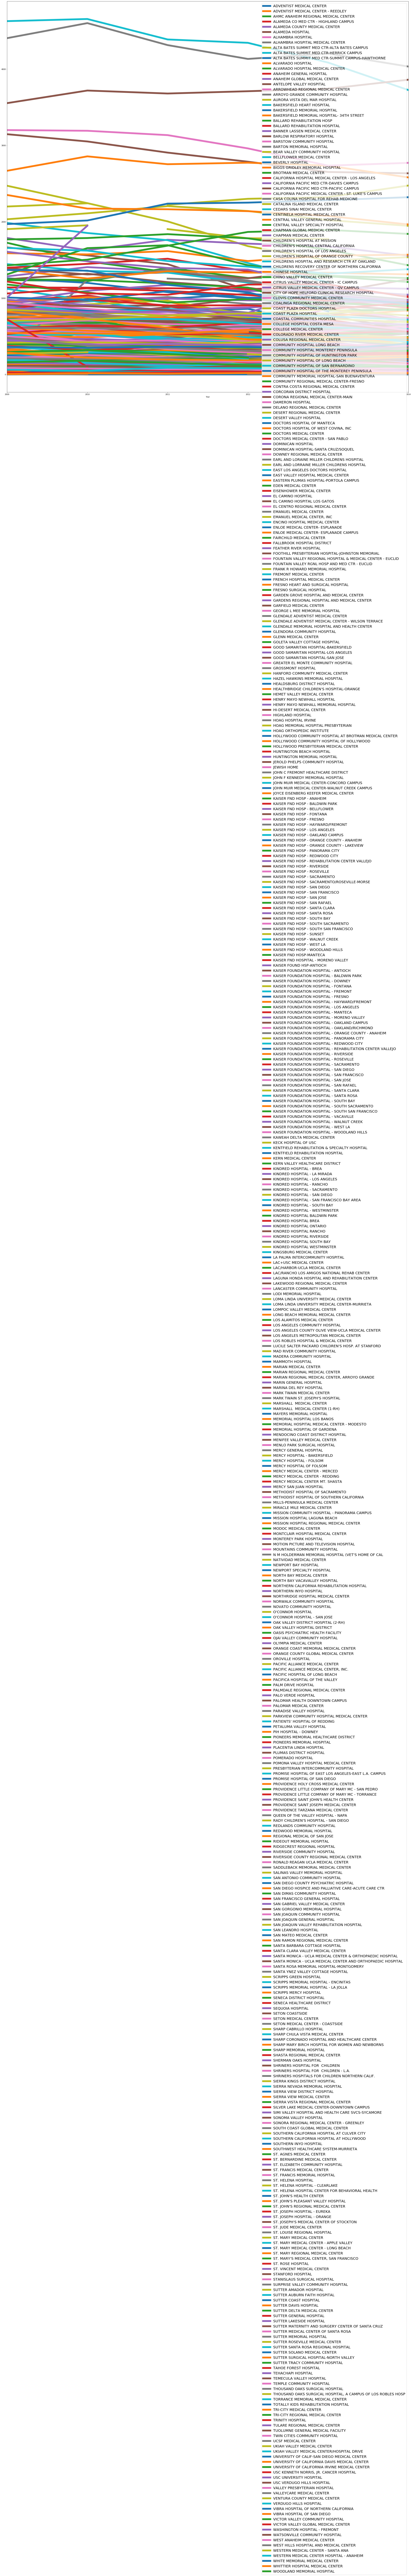

In [32]:
#how has the number of diagnosis of respiratory conditions changes over time for each facility
fig,ax = plt.subplots(figsize=[40,40])
filtered = diagnosis_data[diagnosis_data["Principal Diagnosis Group"]=="Neoplasms"].copy()
filtered.groupby(["Year","Facility Name"]).sum()['Count'].unstack().plot(ax=ax, linewidth=10)
ax.legend(prop={'size': 20})

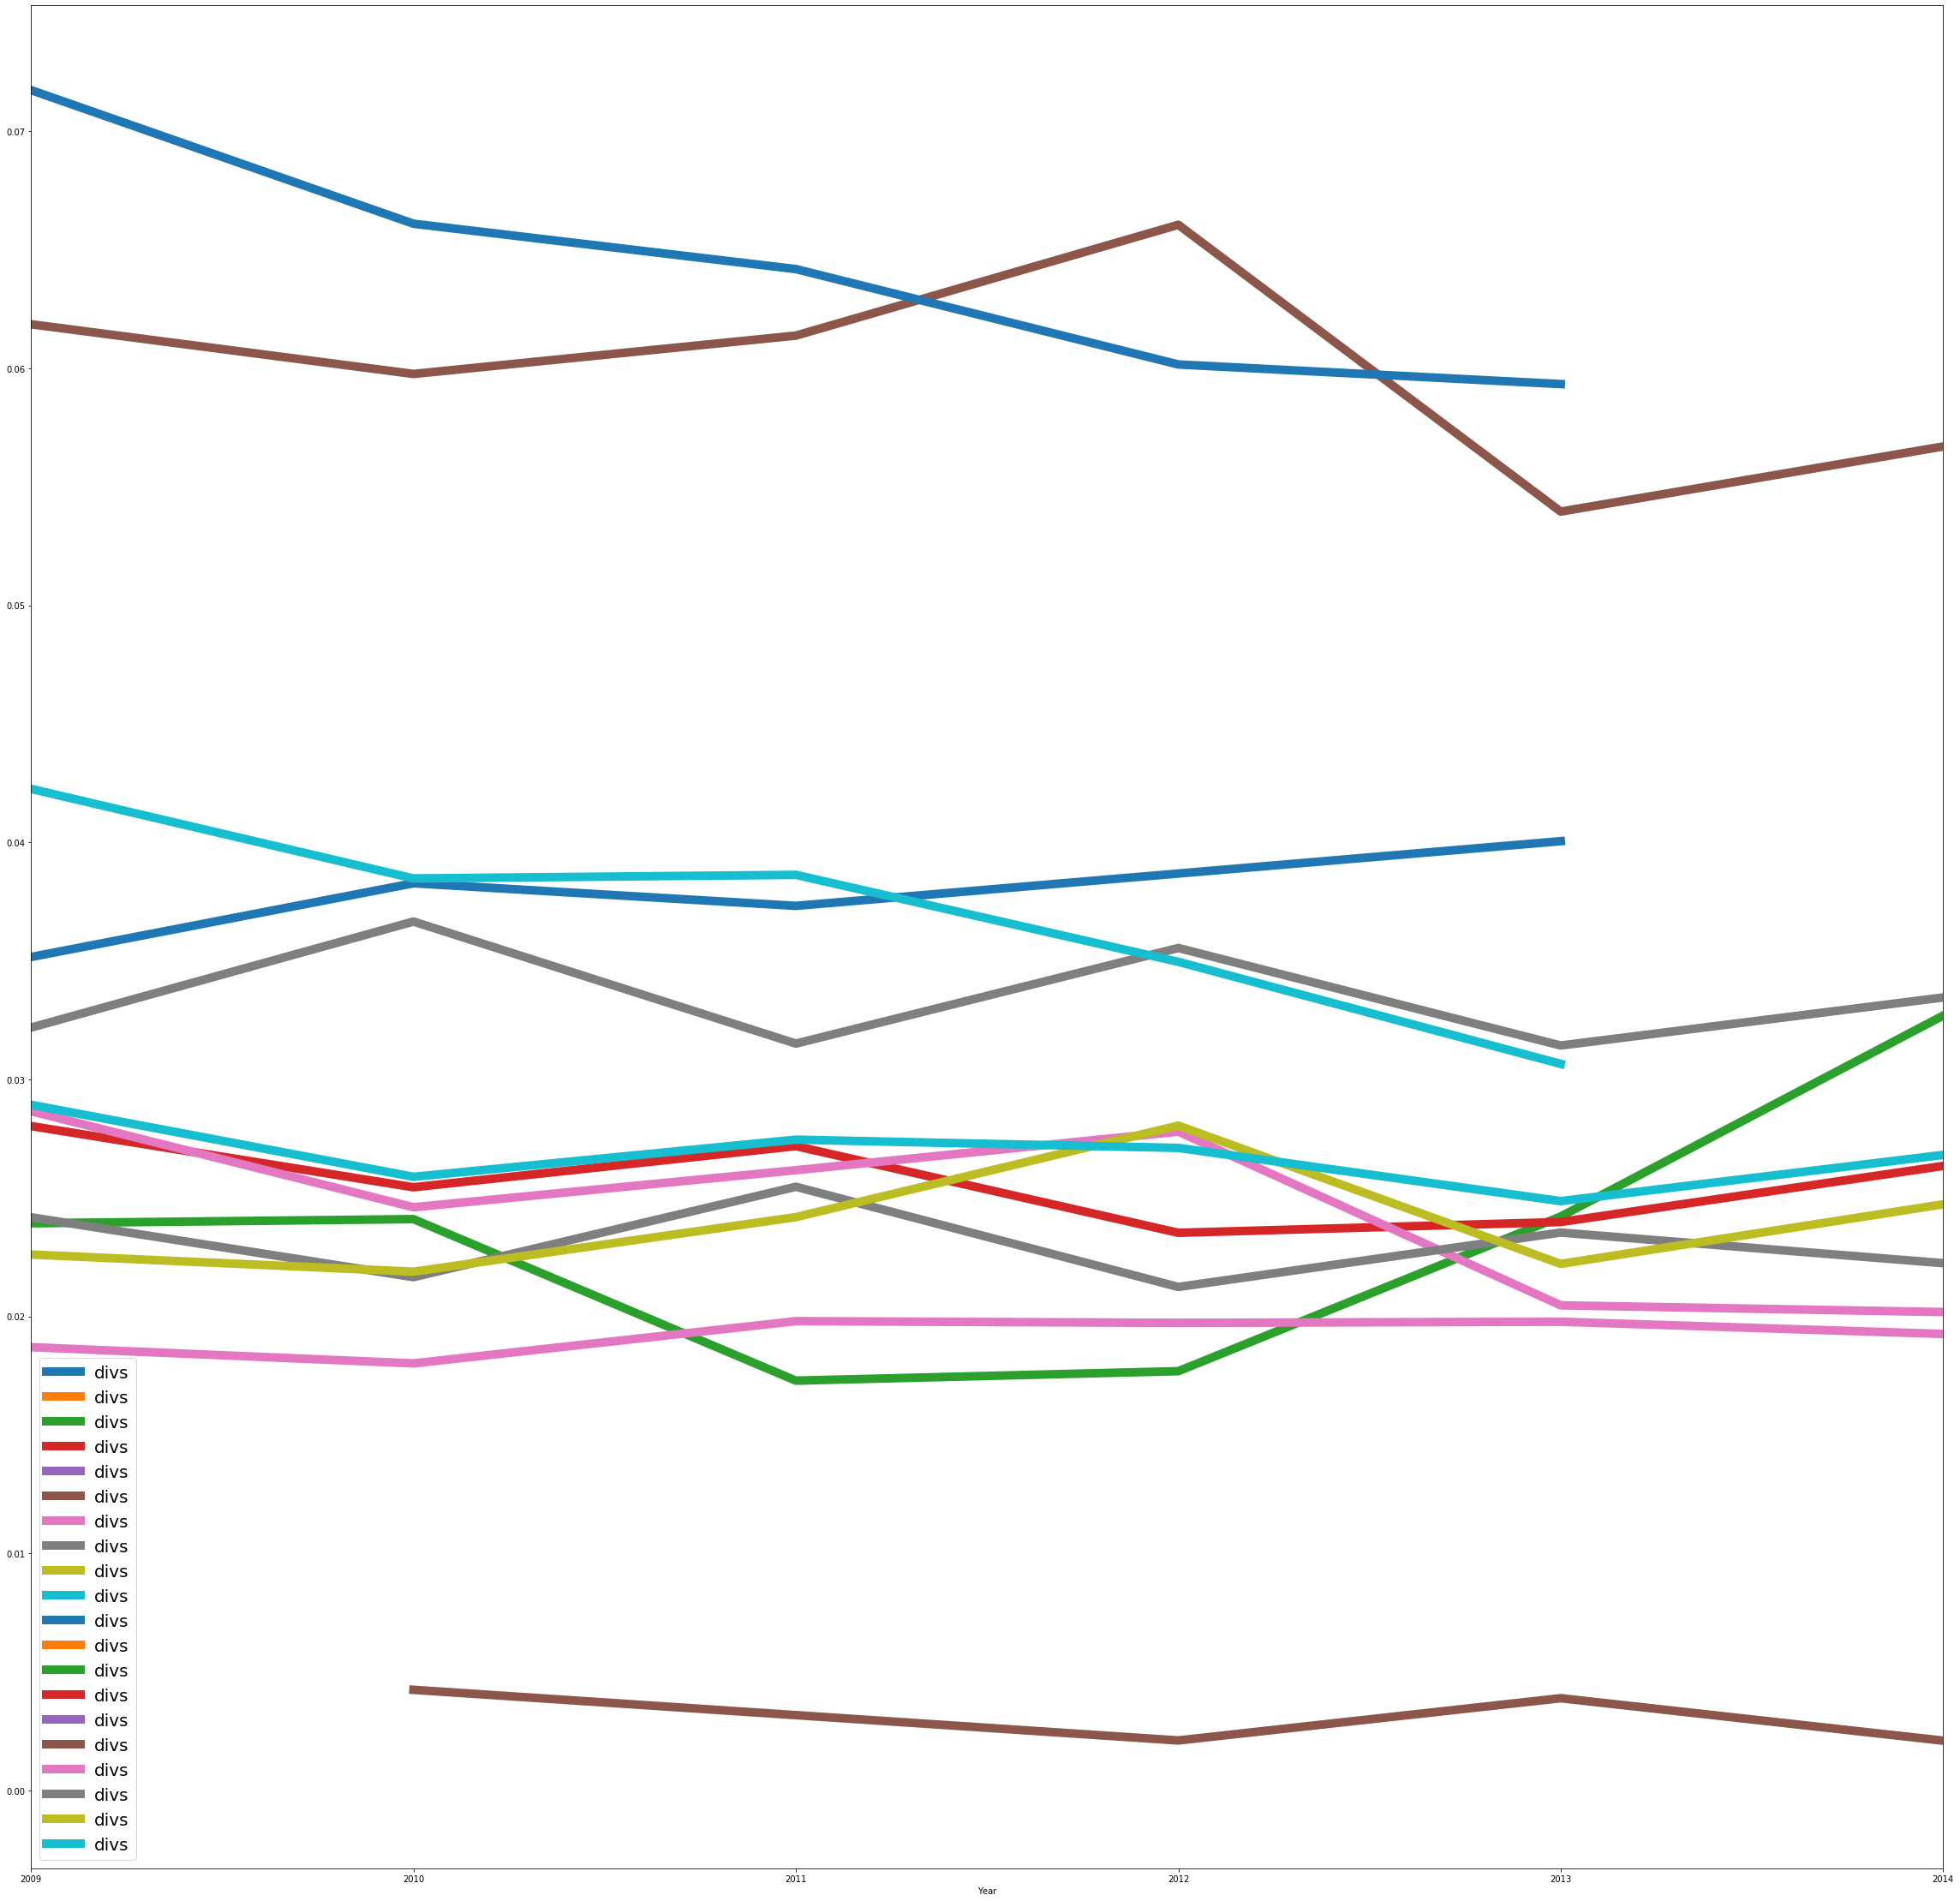

In [33]:
#how has the number of diagnosis of respiratory conditions changes over time for each facility divided by total diagnosis
fig,ax = plt.subplots(figsize=[40,40])

def divide_two_cols(df_sub):
    df_sub['divs'] = df_sub['Count'] / float(df_sub['Count'].sum())
    return df_sub
#limit to ALAMEDA county for ease of visual and computation
#create df with new column of counts of diagnosis divided by all counts of that diagnosis for a facility in a given year
filtered = diagnosis_data[diagnosis_data["County Name"]=="ALAMEDA"].groupby(['Year','Facility Name']).apply(divide_two_cols)
#remove all diagnosis except neoplasms
filtered = filtered[filtered["Principal Diagnosis Group"]=="Neoplasms"]
filtered.groupby("Facility Name").plot(x="Year", y="divs", ax=ax, linewidth=10)
ax.legend(prop={'size': 20})

In [37]:

def divide_two_cols(df_sub):
    df_sub['normalized_count'] = df_sub['Count'] / float(df_sub['Count'].sum())
    return df_sub

filtered = diagnosis_with_loc.groupby(['Year','Facility Name']).apply(divide_two_cols)
filtered

Year  OSHPD ID                         Facility Name Type of Control  \
0      2009     10735                      ALAMEDA HOSPITAL        District   
1      2009     10735                      ALAMEDA HOSPITAL        District   
2      2009     10735                      ALAMEDA HOSPITAL        District   
3      2009     10735                      ALAMEDA HOSPITAL        District   
4      2009     10735                      ALAMEDA HOSPITAL        District   
...     ...       ...                                   ...             ...   
21510  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21511  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21512  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21513  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   
21514  2014     74097  KAISER FOUNDATION HOSPITAL - ANTIOCH      Non-Profit   

        County Name          Principal Diagnosis Group  Count  \
0           ALAMEDA                         Infections    243   
1           ALAMEDA                          Neoplasms     68   
2           ALAMEDA               Endocrine/Metabolism     99   
3           ALAMEDA         Blood/Blood-forming Organs     54   
4           ALAMEDA               Psychoses & Neurosis     33   
...             ...                                ...    ...   
21510  CONTRA COSTA                Perinatal Disorders     47   
21511  CONTRA COSTA                           Symptoms    103   
21512  CONTRA COSTA       Injuries/Drugs/Complications    450   
21513  CONTRA COSTA  Other Reasons for Health Services     23   
21514  CONTRA COSTA                             Births   1564   

                         lowercase_facility   Latitude   Longitude  \
0                          alameda hospital  37.762657 -122.253899   
1                          alameda hospital  37.762657 -122.253899   
2                          alameda hospital  37.762657 -122.253899   
3                          alameda hospital  37.762657 -122.253899   
4                          alameda hospital  37.762657 -122.253899   
...                                     ...        ...         ...   
21510  kaiser foundation hospital - antioch  37.951855 -121.776924   
21511  kaiser foundation hospital - antioch  37.951855 -121.776924   
21512  kaiser foundation hospital - antioch  37.951855 -121.776924   
21513  kaiser foundation hospital - antioch  37.951855 -121.776924   
21514  kaiser foundation hospital - antioch  37.951855 -121.776924   

       normalized_count  
0              0.085503  
1              0.023927  
2              0.034835  
3              0.019001  
4              0.011612  
...                 ...  
21510          0.004981  
21511          0.010916  
21512          0.047690  
21513          0.002437  
21514          0.165748  

[21515 rows x 11 columns]

In [38]:
#confirm that the sum of the normalized values are 1
confirmation = filtered.groupby(["Year", "Facility Name"])["normalized_count"].sum()

In [62]:
confirmation.get(round(confirmation,15) != 1.0)

Series([], Name: normalized_count, dtype: float64)

In [74]:
#total num of different diagnosis
total_by_diagnosis = filtered.groupby("Principal Diagnosis Group")["Count"].sum()

In [75]:
all_diagnosis_total = filtered.groupby("Principal Diagnosis Group")["Count"].sum().sum()

In [174]:
normalized_total_diagnosis_rate = total_by_diagnosis / all_diagnosis_total

In [80]:
normalized_total_diagnosis_rate

Principal Diagnosis Group
All Pregnancies                         0.141010
Births                                  0.128218
Blood/Blood-forming Organs              0.010681
Circulatory                             0.118012
Congenital Anomalies (Birth Defects)    0.003923
Digestive                               0.094672
Endocrine/Metabolism                    0.033576
Genitourinary                           0.041661
Infections                              0.051462
Injuries/Drugs/Complications            0.077277
Musculoskeletal                         0.046355
Neoplasms                               0.041199
Nervous & Sensory Systems               0.018968
Other Reasons for Health Services       0.022520
Perinatal Disorders                     0.005455
Psychoses & Neurosis                    0.038680
Respiratory                             0.070854
Skin Disorders                          0.017153
Symptoms                                0.038325
Name: Count, dtype: float64

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 191 artists>

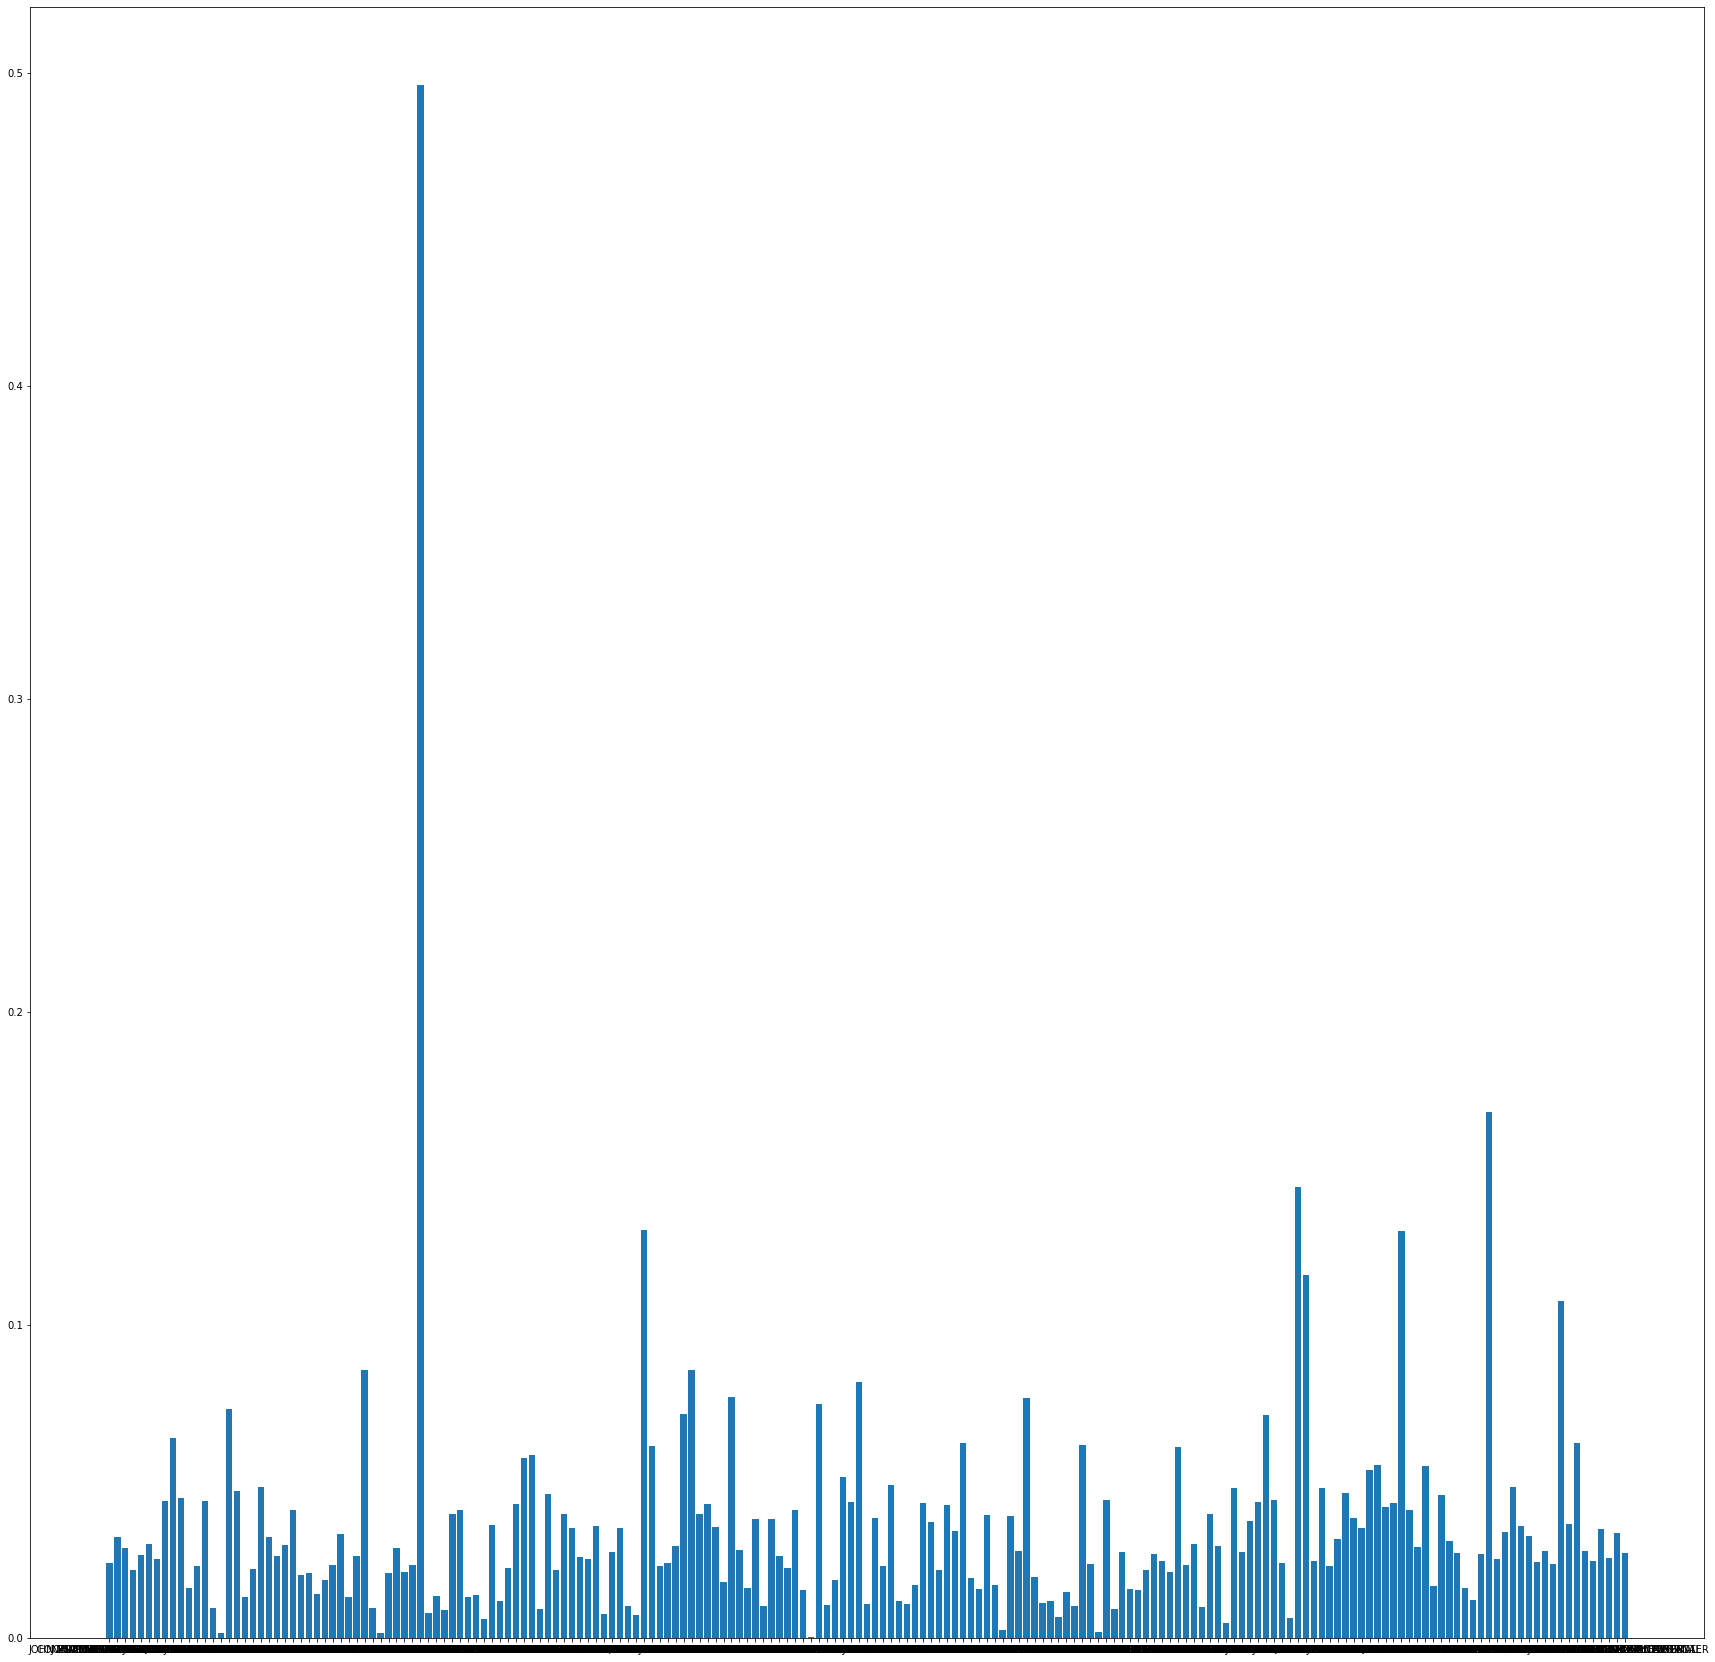

In [92]:
#graph of normalized neoplasm diagnosis
fig,ax = plt.subplots(figsize=[30,30])
temp_norm = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"]
temp_facility = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]["Facility Name"]
ax.bar(temp_facility, temp_norm)

In [93]:
filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"][filtered["normalized_count"]>0.1]

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Year  OSHPD ID                                    Facility Name  \
3951   2009    190176  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
6973   2009    190796                RONALD REAGAN UCLA MEDICAL CENTER   
15492  2009    381154                              UCSF MEDICAL CENTER   
15606  2009    382715                                 CHINESE HOSPITAL   
16925  2009    414018                     MENLO PARK SURGICAL HOSPITAL   
17965  2009    454013                    PATIENTS' HOSPITAL OF REDDING   
18896  2009    504038                     STANISLAUS SURGICAL HOSPITAL   

      Type of Control    County Name Principal Diagnosis Group  Count  \
3951       Non-Profit    LOS ANGELES                 Neoplasms   3147   
6973               UC    LOS ANGELES                 Neoplasms   3201   
15492              UC  SAN FRANCISCO                 Neoplasms   4405   
15606      Non-Profit  SAN FRANCISCO                 Neoplasms    237   
16925      Non-Profit      SAN MATEO                 Neoplasms     60   
17965        Investor         SHASTA                 Neoplasms     64   
18896        Investor     STANISLAUS                 Neoplasms    121   

                                    lowercase_facility   Latitude   Longitude  \
3951   city of hope helford clinical research hospital  34.127777 -117.972443   
6973                 ronald reagan ucla medical center  34.066216 -118.445316   
15492                              ucsf medical center  37.763106 -122.457822   
15606                                 chinese hospital  37.795670 -122.409177   
16925                     menlo park surgical hospital  37.462183 -122.159368   
17965                    patients' hospital of redding  40.585941 -122.416679   
18896                     stanislaus surgical hospital  37.664726 -120.958382   

       normalized_count  
3951           0.496294  
6973           0.130429  
15492          0.144204  
15606          0.116006  
16925          0.129870  
17965          0.167979  
18896          0.107651

In [ ]:
#City of hope helford cilinical research hospital is the leading cancer hospital, so it is an outlier

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


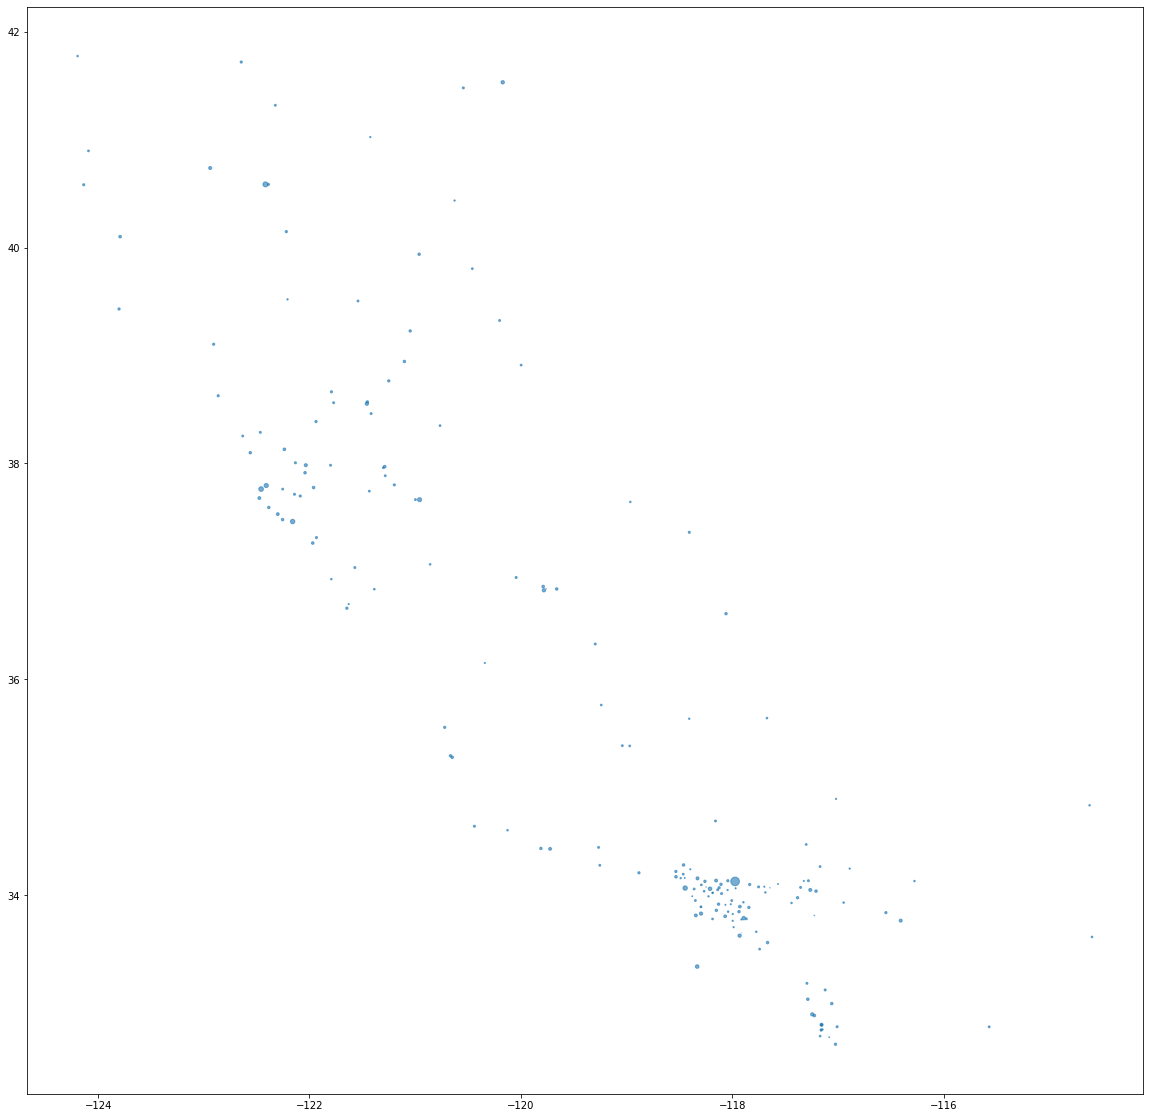

In [170]:
#grpah of location of hospitals with size based on normalized count of neoplasms
fig,ax = plt.subplots(figsize=[20,20])
temp = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]
ax.scatter(temp["Longitude"],temp["Latitude"],s=150*temp["normalized_count"], alpha=0.6)

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


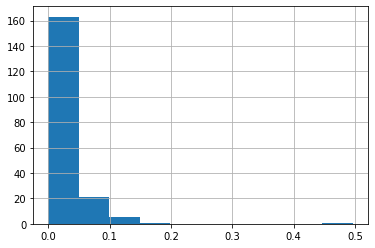

In [172]:

temp = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]
temp["normalized_count"].hist()

In [173]:
#as we can see above the normalized count of neoplasm diagnosis is a poisson distribution

In [204]:
temp = temp.drop([3951])

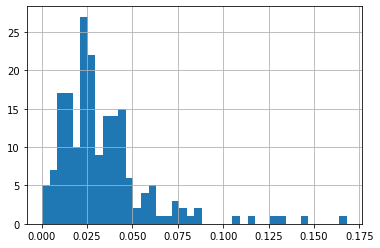

In [212]:
temp["normalized_count"].hist(bins=40)
#after removing the outlier it more closely approximates a binomial

In [202]:
stats.poisson.rvs(mu=1.5,size=10)

array([0, 0, 1, 1, 1, 2, 1, 0, 2, 2])

In [ ]:
0.023927

In [ ]:
stat, p_val = stats.ttest_ind(male_ctr, female_ctr, equal_var=False)

In [217]:
total_by_diagnosis.sum()

11336018

In [228]:
binomial = stats.binom(1000, normalized_total_diagnosis_rate["Neoplasms"])

Text(0.5, 1.0, '# of neoplasm diagnosis under the Null Hypothesis (state wide rate)')

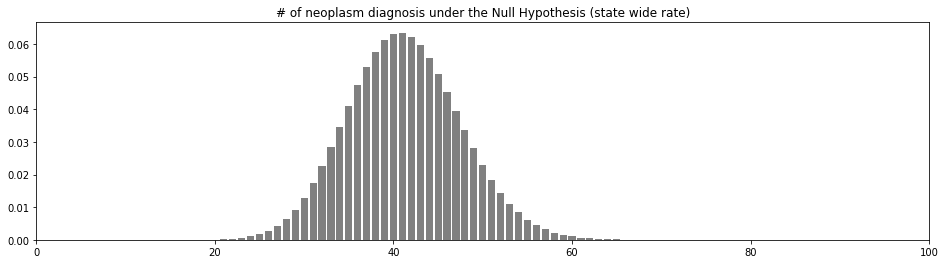

In [231]:
fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(1000), [binomial.pmf(i) for i in range(1000)], 
              align="center", color="grey")
ax.set_xlim(0, 100)
ax.set_title("# of neoplasm diagnosis under the Null Hypothesis (state wide rate)")

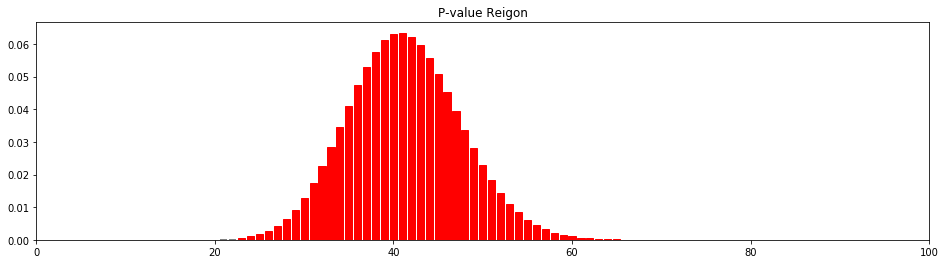

In [242]:
fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(1000), 
              [binomial.pmf(i) for i in range(1000)], 
              color="grey", align="center")
ax.set_xlim(0, 100)

for i in range(23, 100):
    bars[i].set_color('red')
    
_ = ax.set_title("P-value Reigon")

In [282]:
# binom of the average rate of neoplasm diagnosis state wide
binomial = stats.binom(1000, normalized_total_diagnosis_rate["Neoplasms"])

prob_equal_or_more_extreme = 1 - binomial.cdf(23)
print("Probability of Observing Data Equal or More Extreme than Actual: {:2.6}".format(
    prob_equal_or_more_extreme))

Probability of Observing Data Equal or More Extreme than Actual: 0.998772


In [296]:
temp = filtered[filtered["Year"]==2009][filtered["Principal Diagnosis Group"]=="Neoplasms"]["normalized_count"]

temp = temp*1000

/home/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [297]:
high_values = pd.DataFrame(temp)

high_values["random chance"]=1-binomial.cdf(temp)

In [298]:
high_values[high_values["random chance"]<.005]

normalized_count  random chance
953           63.942573   4.525613e-04
1625          73.245614   1.517226e-06
3323          85.714286   2.621587e-10
3951         496.293960   1.110223e-16
5409          58.320428   4.426126e-03
6973         130.429468   1.110223e-16
7084          61.202454   1.181342e-03
7535          71.596244   5.325431e-06
7649          85.573161   2.621587e-10
8193          76.923077   2.079453e-07
9297          74.727932   7.930621e-07
9844          81.731869   5.795402e-09
11155         62.230471   7.369008e-04
12003         76.657211   2.079453e-07
12724         61.520305   1.181342e-03
13978         61.039203   1.181342e-03
15080         71.207171   5.325431e-06
15492        144.204013   1.110223e-16
15606        116.005874   1.110223e-16
16925        129.870130   1.110223e-16
17965        167.979003   1.110223e-16
18896        107.651246   1.110223e-16
19074         62.200957   7.369008e-04

In [300]:
#a dataframe with only the hopsitals from 2009 that have a less than .5% chance of having such a high neoplasm disagnosis rate
high_neoplasm_2009 = filtered.iloc[high_values[high_values["random chance"]<.005].index]

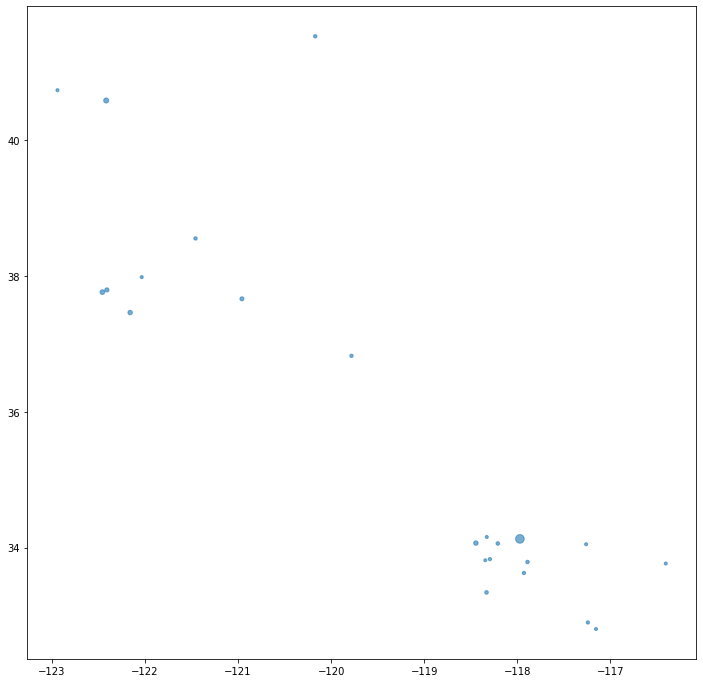

In [302]:
#grpah of location of hospitals with size based on normalized count of neoplasms
fig,ax = plt.subplots(figsize=[12,12])
ax.scatter(high_neoplasm_2009["Longitude"],high_neoplasm_2009["Latitude"],s=150*high_neoplasm_2009["normalized_count"], alpha=0.6)

Text(0.5, 1.0, 'Cumulative Number of Comments over Two Months')

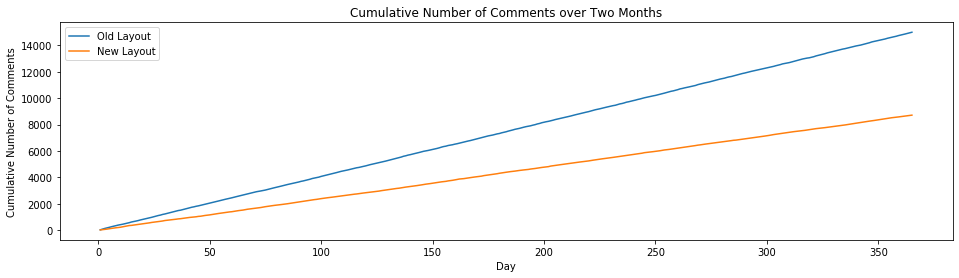

Rate of comments, new layout: 0.02
Rate of comments, old layout: 0.04


p-value for full experiment: 0.71
